<a href="https://colab.research.google.com/github/himaja-56/VRSU/blob/main/VRSU_ClassicalMLBasedObjectRecognitionProgram5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Total number of images (X): 1797
Total number of labels (Y): 1797
SVM training completed.
Model Accuracy: 0.8166666666666667


Saving program5.jpeg to program5.jpeg


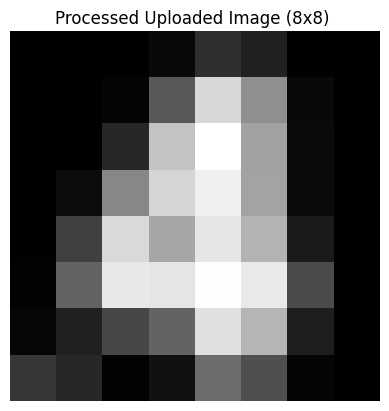

Predicted Digit: 4


In [ ]:
#Classical ML based Object recognition

import numpy as np
import matplotlib.pyplot as plt
import cv2

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

from skimage.feature import hog
from skimage.transform import resize

digits = datasets.load_digits()
X = digits.images
y = digits.target

print ("Total number of images (X):", X. shape[0])
print ("Total number of labels (Y):", y. shape[0])

features = []

for img in X:
  hog_feature = hog(
      img,
      pixels_per_cell=(4, 4),
      cells_per_block=(1, 1),
      orientations=9
  )
  features. append (hog_feature)

features = np. array(features)


X_train, X_test, y_train, y_test = train_test_split(
    features, y, test_size=0.2, random_state=42
)

model = SVC (kernel='linear')
model.fit(X_train, y_train)

print("SVM training completed.")

y_pred = model.predict (X_test)
accuracy = accuracy_score(y_test, y_pred)

print ("Model Accuracy:", accuracy)

from google.colab import files

uploaded = files.upload ()

for file_name in uploaded.keys():
  img = cv2.imread (file_name)

if len(img.shape) == 3:
  img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
else:
  img_gray = img

img_resized = resize(img_gray, (8, 8), anti_aliasing=True)

img_resized = img_resized / img_resized.max()

img_resized = 1 - img_resized
plt.imshow(img_resized, cmap="gray")
plt.title("Processed Uploaded Image (8x8) ")
plt.axis('off')
plt.show()

test_feature = hog(
  img_resized,
  pixels_per_cell=(4, 4),
  cells_per_block=(1, 1),
  orientations=9
)
prediction = model.predict([test_feature])
print("Predicted Digit:", prediction[0])

Total number of images: 1797
Total number of labels: 1797
Epoch 1/15


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.3092 - loss: 2.2104 - val_accuracy: 0.6319 - val_loss: 1.7209
Epoch 2/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7313 - loss: 1.3790 - val_accuracy: 0.8264 - val_loss: 0.7554
Epoch 3/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8528 - loss: 0.5712 - val_accuracy: 0.8681 - val_loss: 0.4294
Epoch 4/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9191 - loss: 0.3406 - val_accuracy: 0.9097 - val_loss: 0.3142
Epoch 5/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9508 - loss: 0.2419 - val_accuracy: 0.9167 - val_loss: 0.2485
Epoch 6/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9413 - loss: 0.2336 - val_accuracy: 0.9167 - val_loss: 0.2819
Epoch 7/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9558 - loss: 0.1620 - val_accuracy: 0.9236 - val_loss: 0.2807
Epoch 8/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9476 - loss: 0.1763 - val_accuracy: 0.9444 - val_loss: 0.

Saving program5.jpeg to program5 (1).jpeg


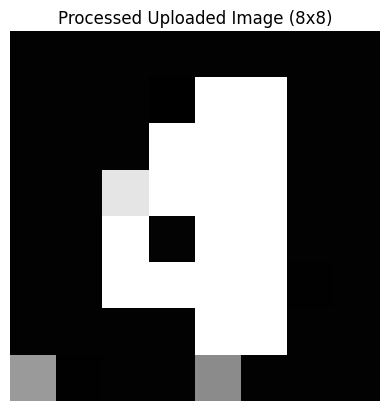

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Predicted Digit: 1


In [ ]:
# CNN-based Object Recognition (Digits)

import numpy as np
import matplotlib.pyplot as plt
import cv2

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Load dataset
digits = datasets.load_digits()
X = digits.images
y = digits.target

print("Total number of images:", X.shape[0])
print("Total number of labels:", y.shape[0])

# Normalize images
X = X / 16.0  # pixels range 0–16
X = X.reshape(-1, 8, 8, 1)

# One-hot encode labels
y = to_categorical(y, num_classes=10)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Build CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(8, 8, 1)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),

    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train model
model.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.1)

print("CNN training completed.")

# Evaluate model
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

accuracy = accuracy_score(y_test_classes, y_pred_classes)
print("Model Accuracy:", accuracy)

# Upload image
from google.colab import files
uploaded = files.upload()

for file_name in uploaded.keys():
    img = cv2.imread(file_name, cv2.IMREAD_GRAYSCALE)

# Resize and preprocess image
img_resized = cv2.resize(img, (8, 8))
img_resized = img_resized / img_resized.max()
img_resized = 1 - img_resized
img_resized = img_resized.reshape(1, 8, 8, 1)

# Display image
plt.imshow(img_resized.reshape(8, 8), cmap="gray")
plt.title("Processed Uploaded Image (8x8)")
plt.axis('off')
plt.show()

# Predict digit
prediction = model.predict(img_resized)
print("Predicted Digit:", np.argmax(prediction))
